In [160]:
import numpy as np
#matplotlib 
from numpy import cos, sin
import matplotlib.pyplot as plt
#Import math module
#import math
#Import LMfit to minimize chi^2.
import lmfit
from lmfit import Minimizer, Parameters, report_fit
#from lmfit import minimize, Parameters
import sys
print(sys.getrecursionlimit)
sys.getrecursionlimit

X,Y = np.loadtxt('Test.txt', skiprows=0, unpack=True)

print(X)
print(Y)

def Parabola(X,a,b,c):
    #pars = [a,b,c]
    #Y = (pars[0] + pars[1] * X + pars[2] * X ** 2) #Also works!
    return (a + b * X + c * X ** 2) #works!

#d=5

# #def chi(params, Q0ch,Q1ch,Q2ch,Q3ch,Q4ch,Q5ch,Q6ch,Q7ch,Q8ch,Q9ch,Q10ch,Q11ch,Q0m,Q1m,Q2m,Q3m,Q4m,Q5m,Q6m,Q7m,Q8m,Q9m,Q10m,Q11m):
# def chi(params, X, Y):
    
#     a = params['a']
#     b = params['b']
#     c = params['c']
    
#     #delta = (sigexp-XS(E0[0],theta[0]))/uncertainty
#     #delta = (Y - (a + b * X + c * X ** 2))/0.001  #Works!
#     delta = (Y - Parabola(X,a,b,c))  #Also works!
#     chi = delta 
#     return chi

# params = Parameters()
# params.add('a', value=0)#, min=0)
# params.add('b', value=0)#, min=0)
# params.add('c', value=0)#, min=0)

# minner = Minimizer(chi, params, fcn_args=(X, Y))
# result = minner.minimize()
# final = Y + result.residual
# report_fit(result)

# #lmfit.printfuncs.report_fit(minner.params, min_correl=0.5)

# plt.plot(X,Y,'k+')
# plt.plot(X,final,'r')
# plt.show()

<built-in function getrecursionlimit>
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[  1.   4.   9.  16.  25.  38.  45.  62.  86. 100.]


In [125]:
from lmfit import Model

In [152]:
model=Model(Parabola)

pars = Parameters()
#pars = model.make_params()
#d=0
pars.add('a', value=0)
pars.add('b', value=0)
pars.add('c', value=0)

# pars.add('x', value=5, vary=True)
# pars.add('delta', value=5, max=10, vary=True)
# pars.add('y', expr='delta-x')

pars.add('c', expr='1 - a - b')   #Constrains the fit such that a+b+c=1.

#pars.add('c'+'a'+'b', expr='1')   #Creates variable cab = 1. Oops.
#pars.add('c+a+b', expr='1')        #Not valid parameter name.
#pars.add('d', value=0, vary=False, expr='1 - a - b')  #Doesn't fix d=0.

#pars.add('d', value=0, vary=False)
#z = Parameter(expr='1+c')
#pars.add('d',vary=False, expr='1-a')
#pars.add(expr='1 - a - c')
#pars.add('d', expr='1 - a - c')
#pars.add('d', value=0, vary=False, expr='1 - a - b')
#pars.add('d', 0=='1-a-b')
#pars = model.make_params()
print(model.param_names, model.independent_vars)

['a', 'b', 'c'] ['X']


In [153]:
#result=model.fit(Y,X=X,a=0,b=0,c=0,weights=1/3)

result=model.fit(Y,pars,X=X,weights=1/3)

In [154]:
print(result.fit_report())

[[Model]]
    Model(Parabola)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 10
    # variables        = 2
    chi-square         = 5.17351951
    reduced chi-square = 0.64668994
    Akaike info crit   = -2.59031880
    Bayesian info crit = -1.98514861
[[Variables]]
    a:  0.32450980 +/- 0.65199943 (200.92%) (init = 0)
    b: -0.36974153 +/- 0.72877958 (197.11%) (init = 0)
    c:  1.04523173 +/- 0.07848551 (7.51%) == '1 - a - b'
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -1.000



(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

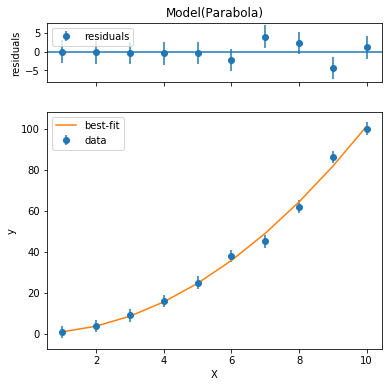

In [155]:
result.plot()

In [156]:
print(result.ci_report())

      99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 a:  -2.78836  -1.54290  -0.69538   0.32451  +0.69538  +1.54290  +2.78836
 b:  -3.11672  -1.72460  -0.77726  -0.36974  +0.77726  +1.72460  +3.11672


In [157]:
print(result.best_values)

{'a': 0.32450980214433056, 'b': -0.36974153101358287, 'c': 1.0452317288692523}


In [9]:
print(result.best_values['a'])

0.9333333906703979
